In [16]:
#importing necessary packages
# ---------------------------------------------------------
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import seaborn as sns

from sklearn.ensemble import VotingClassifier
sys.path.append('../../../../pywholebrain')
sys.path.append('/home/ackmanadmin/Documents/pywholebrain')

from hdf5manager import hdf5manager as h5
from mpl_toolkits.axes_grid1 import make_axes_locatable

# plt.style.use('publication')
plt.rcParams['font.size'] = 8

save = True


In [34]:
#creating appropriate datasets
# ---------------------------------------------------------
# classifier_h5 = h5('/home/ackmanadmin/Documents/classifier/p21_classifier.hdf5')
# var = classifier_h5.load('training_keys')
# data = pd.read_csv('/home/ackmanadmin/Documents/classifier/p21_classifier_metrics.tsv', sep = "\t", index_col='exp_ic').copy()
# confidence = pd.read_csv('/home/ackmanadmin/Documents/classifier/p21_classifier_confidence.tsv', sep = "\t", index_col='exp_ic')

data = pd.read_csv('../../training_dataset.tsv', sep = "\t", index_col='exp_ic')
confidence = pd.read_csv('../../20min_p21_confidence.tsv', sep = "\t", index_col='exp_ic')


#renaming the columns
neural_dict = {}

for col in data.columns:
    if "." in col:
        new_col = col.replace(".", "_")
        neural_dict[col] = new_col

data = data.rename(columns=neural_dict)

domain_vars =['spatial_min', 'spatial_max', 
              'region_minaxis', 'threshold_area', 'region_extent', 'threshold_perc', 'region_majaxis', 'region_majmin_ratio', 
              'temporal_min', 
              'freq_rangesz',
              #'move_corr'
             ]
data = data.fillna(value=0).copy()
dataAll = data[domain_vars].copy()


# nodomain_vars =['spatial.min', 'spatial.max',
#                 'freq.rangesz','freq.maxsnr', 'freq.range.low', 'freq.range.high',
#                 'temporal.max', 'temporal.std', 'temporal.autocorr']

# dataNoThresh = data[data['threshold.area'] == 0].copy()
# dataNoThresh = dataNoThresh[nodomain_vars].fillna(value=0).copy()

# dataThresh = data[data['threshold.area'] != 0].copy()
# dataThresh = dataThresh[domain_vars].fillna(value=0).copy()

for col in dataAll.columns:
    dataAll[col] = (dataAll[col] - np.mean(dataAll[col])) / (np.std(dataAll[col], ddof=1)) 
# for col in dataThresh.columns:
#     dataThresh[col] = (dataThresh[col] - np.mean(dataThresh[col])) / (np.std(dataThresh[col], ddof=1)) 
# for col in dataNoThresh.columns:
#     dataNoThresh[col] = (dataNoThresh[col] - np.mean(dataNoThresh[col])) / (np.std(dataNoThresh[col], ddof=1)) 
    
    
    
    

In [3]:
#Plotting TruncatedSVD Plot
# ---------------------------------------------------------
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2, n_iter=100, random_state=42)

X_reduced_SVD3 = svd.fit_transform(dataAll.values)


fig = plt.figure(figsize = (5,4), constrained_layout=False)

gs = fig.add_gridspec(8, 11)
gs.update(wspace = 0.15, hspace = 1)

ax0 = fig.add_subplot(gs[:4, :4])
ax1 = fig.add_subplot(gs[4:, :4], sharey=ax0)
ax2 = fig.add_subplot(gs[:4, 4:8])
ax3 = fig.add_subplot(gs[4:, 4:8], sharey=ax2)
ax4 = fig.add_subplot(gs[:4, 9])
ax5 = fig.add_subplot(gs[4:, 9])
ax6 = fig.add_subplot(gs[:4, 10])

fig.text(0.08, 0.5, 'SVD1', ha='center',rotation='vertical')
fig.text(0.4, 0.02, 'SVD2', ha='center')
fig.text(0.85, 0.02, 'Frequency', ha='center')

ph = ax0.scatter(X_reduced_SVD[:, 0], X_reduced_SVD[:, 1], c=data.loc[dataThresh.index, 'signal'],
                 cmap=plt.cm.get_cmap('RdYlBu',2), s = 20, alpha = 1)
ax0.set_title('')

divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.2)
cbar2 = fig.colorbar(ph, ticks=[0.25, 0.75], cax=cax, orientation='vertical')
cbar2.ax.set_yticklabels(['Artifact', 'Signal'], rotation = 90)
cbar2.ax.yaxis.set_ticks_position('left')
cbar2.ax.tick_params(size=0)

ph2 = ax1.scatter(X_reduced_SVD2[:, 0], X_reduced_SVD2[:, 1], c=data.loc[dataNoThresh.index, 'signal'], 
                  cmap=plt.cm.get_cmap('RdYlBu',2), s = 20, alpha = 1)
# ax1.set_title('Subset 1')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.2)
cbar2 = fig.colorbar(ph2, ticks=[0.25, 0.75], cax=cax, orientation='vertical')
cbar2.ax.set_yticklabels(['Artifact', 'Signal'], rotation = 90)
cbar2.ax.yaxis.set_ticks_position('left')
cbar2.ax.tick_params(size=0)

ph3 = ax2.scatter(X_reduced_SVD[:, 0], X_reduced_SVD[:, 1], c=confidence.loc[dataThresh.index, 'rnd_clf_prob'], cmap='PiYG', s = 20, alpha = 1)
# ax0.set_title('')
ax2.set_yticklabels([])

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.2)
cbar2 = fig.colorbar(ph3, ticks=[0.25, 0.75], cax=cax, orientation='vertical')
cbar2.ax.set_yticklabels(['Artifact', 'Signal'], rotation = 90)
cbar2.ax.yaxis.set_ticks_position('left')
cbar2.ax.tick_params(size=0)

ph4 = ax3.scatter(X_reduced_SVD2[:, 0], X_reduced_SVD2[:, 1], c=confidence.loc[dataNoThresh.index, 'rnd_clf_prob'], cmap='PiYG', s = 20, alpha = 1)
# ax1.set_title('Subset 1')
plt.setp(ax3.get_yticklabels(), visible = False)

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.2)
cbar2 = fig.colorbar(ph4, ticks=[0.25, 0.75], cax=cax, orientation='vertical')
cbar2.ax.set_yticklabels(['Artifact', 'Signal'], rotation = 90)
cbar2.ax.yaxis.set_ticks_position('left')
cbar2.ax.tick_params(size=0)

nbins = 25

bins = np.linspace(0,1,nbins)
colors=  plt.cm.PiYG(bins)

hist1, bin_edges1 = np.histogram(confidence.loc[dataThresh.index, 'rnd_clf_prob'], bins)
hist2, bin_edges2 = np.histogram(confidence.loc[dataNoThresh.index, 'rnd_clf_prob'], bins)

ax4.barh(bin_edges1[:-1], np.array(hist1)/sum(hist1), height = 0.04, color=colors, )
ax4.set_ylim(-0.025,1)
ax4.set_xlim(0,.25)
ax4.set_xticks([0,0.1,0.2])
ax4.set_xticklabels([])
ax4.spines['right'].set_visible(False)
ax4.yaxis.tick_left()
ax4.tick_params(axis = 'x', labelrotation=60, labelright='off')

ax5.barh(bin_edges2[:-1], np.array(hist2)/sum(hist2), height = 0.04, color=colors)
ax5.set_xlim(0,0.25)
ax5.set_ylim(-0.025,1)
ax5.set_xticks([0,0.1,0.2])
ax5.tick_params(axis = 'x', labelrotation=60)

ax6.barh(bin_edges1[:-1], np.array(hist1)/sum(hist1), height = 0.04, color=colors)
ax6.set_ylim(-0.025,1)
ax6.set_xlim(0.55,.80)
ax6.tick_params(axis = 'x', labelrotation=60, labelleft='off')
ax6.spines['left'].set_visible(False)
ax6.yaxis.tick_right()
ax6.set_yticklabels([])
ax6.set_xticks([0.6,0.7,0.8])



plt.tight_layout()
if save: 
    plt.savefig('SVD_plots_confidence.svg', dpi = 600)
plt.show()


# ---------------------------------------------------------

NameError: name 'X_reduced_SVD' is not defined

In [18]:
#Plotting TruncatedSVD Plot
# ---------------------------------------------------------
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2, n_iter=100, random_state=42)

X_reduced_SVD3 = svd.fit_transform(dataAll.values)

In [35]:
# distribution of confidences
nbins = 10
bins = np.linspace(0,1,nbins+1)

hist_dist_all = np.zeros((len(confidence.columns), nbins))
for i, col in enumerate(confidence.columns):
    hist_dist_all[i], bin_edges1 = np.histogram(confidence.loc[dataAll.index, col], bins)
meanbyindex = confidence.mean(axis=1)

hist_dist_n = np.zeros((len(confidence.columns), nbins))
for i, col in enumerate(confidence.columns):
    hist_dist_n[i], bin_edges1 = np.histogram(confidence.loc[dataAll[data['artifact']==0].index, col], bins)

hist_dist_v = np.zeros((len(confidence.columns), nbins))
for i, col in enumerate(confidence.columns):
    hist_dist_v[i], bin_edges1 = np.histogram(confidence.loc[dataAll[data['hemodynamic']==1].index, col], bins)
    
hist_dist_o = np.zeros((len(confidence.columns), nbins))
for i, col in enumerate(confidence.columns):
    hist_dist_o[i], bin_edges1 = np.histogram(confidence.loc[dataAll[data['movement']==1].index, col], bins)

print(len(meanbyindex))


2190


(0.6470588235294118, 0.0, 0.14901960784313725, 1.0)
(0.9568627450980393, 0.42745098039215684, 0.2627450980392157, 1.0)
(0.19215686274509805, 0.21176470588235294, 0.5843137254901961, 1.0)


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


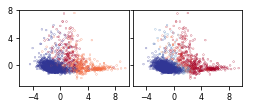

In [20]:
fig = plt.figure(figsize = (4,2), constrained_layout=False)

gs = fig.add_gridspec(4,8)
gs.update(wspace = 0.15, hspace = 1)

ax0 = fig.add_subplot(gs[:3, :4])
ax2 = fig.add_subplot(gs[:3, 4:])

data.loc[data['artifact']==0, 'class'] = 5
data.loc[data['hemodynamic']==1, 'class'] = 0
data.loc[data['movement']==1, 'class'] = 1

colors = np.zeros((len(data), 4))
for i, ind in enumerate(data.index):
    if data.loc[ind, 'class'] == 0:
        colors[i] = plt.cm.get_cmap('RdYlBu',6)(0)
    elif data.loc[ind, 'class'] == 1:
        colors[i] = plt.cm.get_cmap('RdYlBu',6)(1)
    elif data.loc[ind, 'class'] == 5:
        colors[i] = plt.cm.get_cmap('RdYlBu',6)(5)  
print(plt.cm.get_cmap('RdYlBu',6)(0))
print(plt.cm.get_cmap('RdYlBu',6)(1))
print(plt.cm.get_cmap('RdYlBu',6)(5))

ph = ax0.scatter(X_reduced_SVD3[:, 0], X_reduced_SVD3[:, 1], 
                 facecolors="None",
                 edgecolors=colors,
                 lw=0.25,
                 s = 3)

ax0.set_ylim([-3,8])
ax0.set_xlim([-6,10])
ax0.set_title('')
ax0.set_aspect(1)
ax0.set_xticks([-4,0,4,8])
ax0.set_yticks([0,4,8])


colors = np.zeros((len(data), 4))
for i, ind in enumerate(data.index):
    colors[i] = plt.cm.get_cmap('RdYlBu')(meanbyindex[i])


ph3 = ax2.scatter(X_reduced_SVD3[:, 0], X_reduced_SVD3[:, 1], 
                 facecolors="None",
                 edgecolors=colors,
                 lw=0.25,
                 s = 3)

ax2.set_ylim(ax0.get_ylim())
ax2.set_xlim(ax0.get_xlim())
ax2.set_yticklabels('')
ax2.set_xticks([-4,0,4,8])
ax2.set_yticks([0,4,8])
ax2.set_aspect(1)

plt.tight_layout()
if save: 
    plt.savefig('SVD_plots_confidence_OB.svg', dpi = 600)
plt.show()

# print(np.array(hist1)/sum(hist1))
# ---------------------------------------------------------

In [7]:
fig, axs = plt.subplots(1,1,figsize=(2,0.5))

allv = len(meanbyindex)

axs.scatter(binpos, np.ones(len(neur))*0, s = neur/allv*100, 
            edgecolor="none",
            color=plt.cm.get_cmap('RdYlBu',6)(5))
axs.scatter(binpos, np.ones(len(hemo))*-.5, s = hemo/allv*100, 
            edgecolor="none",
            color=plt.cm.get_cmap('RdYlBu',6)(0))
axs.scatter(binpos, np.ones(len(moti))*-.75, s = moti/allv*100,
            edgecolor="none",
            color=plt.cm.get_cmap('RdYlBu',6)(1))
axs.set_xlim(1,0)
axs.set_ylim(-1,0.5)

axs.set_yticklabels([])
axs.set_xticklabels([])
fig.savefig('classifier_performance_mat.svg', dpi=600)
plt.show()

NameError: name 'binpos' is not defined

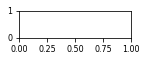

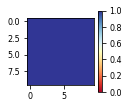

In [8]:
fig = plt.figure(figsize=(1.5,1.5))
plt.imshow(np.ones((10,10)), cmap = 'RdYlBu', vmin=0, vmax=1)
plt.colorbar()
plt.savefig('confidence_colorbar.svg', dpi=600)
plt.show()

highest neuro classified:  71.22821917808193  +/-  0.19506641953304202
highest artifact classified:  22.72840182648403  +/-  0.2624538053797265
highest vasc classified:  7.008538812785399  +/-  0.22352906897754396
highest other classified:  15.719863013698628  +/-  0.13179489477635326


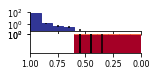

In [36]:
fig, axs = plt.subplots(2,1,figsize=(2,0.75))

allv = len(meanbyindex)
binpos = bin_edges1[:-1] + (bin_edges1[1:] - bin_edges1[:-1])/2
width = (bin_edges1[1:] - bin_edges1[:-1])[0]
# axs[0].bar(binpos, np.mean(hist_dist_n/allv*100, axis=0), 
#            yerr = np.std(hist_dist_n/allv*100, axis=0), 
#            width = width,
#             color=plt.cm.get_cmap('RdYlBu',6)(5),
# #             edgecolor=plt.cm.get_cmap('RdYlBu',6)(5), 
#             linewidth=1)
axs[0].bar(binpos, np.mean(hist_dist_n/allv*100, axis=0), 
           yerr = np.std(hist_dist_n/allv*100, axis=0), 
           width = width,
            color=plt.cm.get_cmap('RdYlBu',6)(5),
#             edgecolor=plt.cm.get_cmap('RdYlBu',6)(5), 
            linewidth=1,
          edgecolor =plt.cm.get_cmap('RdYlBu',6)(5))
axs[1].bar(binpos,np.mean(hist_dist_v/allv*100, axis=0),
           yerr = np.sqrt(np.std(hist_dist_v/allv*100, axis=0)), 
           width = width,
            color=plt.cm.get_cmap('RdYlBu',6)(0),
#            edgecolor=plt.cm.get_cmap('RdYlBu',6)(0), 
            linewidth=1,
          edgecolor =plt.cm.get_cmap('RdYlBu',6)(0))
bottoms = np.mean(hist_dist_v/allv*100, axis=0)
axs[1].bar(binpos, np.mean(hist_dist_o/allv*100, axis=0),
           yerr = np.std(hist_dist_o/allv*100, axis=0),  
           width = width,
           bottom=bottoms,
            color=plt.cm.get_cmap('RdYlBu',6)(1),
#             edgecolor=plt.cm.get_cmap('RdYlBu',6)(1), 
            linewidth=1,
          edgecolor =plt.cm.get_cmap('RdYlBu',6)(1))



axs[0].set_xticklabels([])
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
# axs[1].spines['bottom'].set_visible(False)
axs[0].set_ylim(0.1,100)
axs[0].set_xlim([1,0])
axs[0].set_yscale('log')
axs[0].set_yticks([1,100])

axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
# axs[2].spines['bottom'].set_visible(False)
axs[1].set_ylim(-1,25)

axs[1].set_xlim([1,0])
axs[1].set_yscale('log')
axs[1].set_yticks([1,100])

print('highest neuro classified: ', np.mean(hist_dist_n/allv*100, axis=0)[9], ' +/- ', 
           np.std(hist_dist_n/allv*100, axis=0)[9])
print('highest artifact classified: ', np.mean((hist_dist_v+hist_dist_o)/allv*100, axis=0)[0], ' +/- ', 
           np.std((hist_dist_v+hist_dist_o)/allv*100, axis=0)[0])
print('highest vasc classified: ', np.mean(hist_dist_v/allv*100, axis=0)[0], ' +/- ', 
           np.std(hist_dist_v/allv*100, axis=0)[0])
print('highest other classified: ', np.mean(hist_dist_o/allv*100, axis=0)[0], ' +/- ', 
           np.std(hist_dist_o/allv*100, axis=0)[0])

fig.savefig('classifier_performance_mat_hist.svg', dpi=600)
plt.show()

highest neuro classified:  71.22821917808193  +/-  0.19506641953304202
highest artifact classified:  22.72840182648403  +/-  0.2624538053797265
highest vasc classified:  7.008538812785399  +/-  0.22352906897754396
highest other classified:  15.719863013698628  +/-  0.13179489477635326


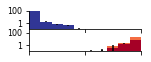

In [40]:
import matplotlib
fig, axs = plt.subplots(2,1,figsize=(2,0.75))

allv = len(meanbyindex)
binpos = bin_edges1[:-1] + (bin_edges1[1:] - bin_edges1[:-1])/2
width = (bin_edges1[1:] - bin_edges1[:-1])[0]
# axs[0].bar(binpos, np.mean(hist_dist_n/allv*100, axis=0), 
#            yerr = np.std(hist_dist_n/allv*100, axis=0), 
#            width = width,
#             color=plt.cm.get_cmap('RdYlBu',6)(5),
# #             edgecolor=plt.cm.get_cmap('RdYlBu',6)(5), 
#             linewidth=1)
axs[0].bar(binpos, np.mean(hist_dist_n/allv*100, axis=0), 
           yerr = np.std(hist_dist_n/allv*100, axis=0), 
           width = width,
            color=plt.cm.get_cmap('RdYlBu',6)(5),
#             edgecolor=plt.cm.get_cmap('RdYlBu',6)(5), 
#             linewidth=1,
#           edgecolor =plt.cm.get_cmap('RdYlBu',6)(5)
          )
axs[1].bar(binpos,np.mean(hist_dist_v/allv*100, axis=0),
           yerr = np.sqrt(np.std(hist_dist_v/allv*100, axis=0)), 
           width = width,
            color=plt.cm.get_cmap('RdYlBu',6)(0),
#            edgecolor=plt.cm.get_cmap('RdYlBu',6)(0), 
#             linewidth=1,
#           edgecolor =plt.cm.get_cmap('RdYlBu',6)(0)
          )
bottoms = np.mean(hist_dist_v/allv*100, axis=0)
axs[1].bar(binpos, np.mean(hist_dist_o/allv*100, axis=0),
           yerr = np.std(hist_dist_o/allv*100, axis=0),  
           width = width,
           bottom=bottoms,
            color=plt.cm.get_cmap('RdYlBu',6)(1),
#             edgecolor=plt.cm.get_cmap('RdYlBu',6)(1), 
#             linewidth=1,
#           edgecolor =plt.cm.get_cmap('RdYlBu',6)(1)
          )

# axs[0].set_xticklabels([])
# axs[0].spines['right'].set_visible(False)
# axs[0].spines['top'].set_visible(False)
# axs[0].spines['bottom'].set_visible(False)
# axs[0].set_ylim(50,80)
# axs[0].set_yscale('log')
# axs[0].set_xticks([])
# axs[0].set_xlim([1,0])

axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
# axs[1].spines['bottom'].set_visible(False)
axs[0].set_ylim(0.1,100)
axs[0].set_xlim([1,0])
axs[0].set_yscale('log')
axs[0].set_yticks([1,100])
axs[0].set_yticklabels([1,100])
axs[0].set_xticks([0,.5,1.00])
axs[0].set_xticklabels([])

axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
# axs[2].spines['bottom'].set_visible(False)
axs[1].set_ylim(0.1,25)
axs[1].set_xlim([1,0])
axs[1].set_yscale('log')
axs[1].set_yticks([1,100])
axs[1].set_yticklabels([1,100])
axs[1].set_xticks([0,.5,1.00])
axs[1].set_xticklabels([])
print('highest neuro classified: ', np.mean(hist_dist_n/allv*100, axis=0)[9], ' +/- ', 
           np.std(hist_dist_n/allv*100, axis=0)[9])
print('highest artifact classified: ', np.mean((hist_dist_v+hist_dist_o)/allv*100, axis=0)[0], ' +/- ', 
           np.std((hist_dist_v+hist_dist_o)/allv*100, axis=0)[0])
print('highest vasc classified: ', np.mean(hist_dist_v/allv*100, axis=0)[0], ' +/- ', 
           np.std(hist_dist_v/allv*100, axis=0)[0])
print('highest other classified: ', np.mean(hist_dist_o/allv*100, axis=0)[0], ' +/- ', 
           np.std(hist_dist_o/allv*100, axis=0)[0])

fig.savefig('classifier_performance_mat_hist.svg', dpi=600)
plt.show()

highest artifact classified:  22.72840182648403  +/-  0.2624538053797265
